## Data preprocessiong. Mid-Point Submission (Group 5)

#### Remove duplicates
#### Handle missing values
#### Normalize data

### 1. Importing Libraries

In [1]:
# First, it is required to imports necessary libraries for data processing, visualization, and TensorFlow operations.

import numpy as np  # For numerical operations
import os, cv2  # For handling file paths and image processing
import re, random   # For regular expressions and random operations
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns  # For data visualization
import tensorflow as tf  # For building and training neural networks

### 2. Column and Label Definitions

In [2]:
"""columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy',] 
           
Labelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy',]   """

"columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy',] \n           \nLabelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy',]   "

In [3]:
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy', 
           'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten',
           'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',
           'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy','Pomegranate__Rotten',
           'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten'] 
           
Labelss =   ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten', 'Bellpepper Healthy', 
           'Bellpepper Rotten', 'Carrot Healthy', 'Carrot Rotten', 'Cucumber Healthy', 'Cucumber Rotten',
           'Grape Healthy', 'Grape Rotten', 'Guava Healthy', 'Guava Rotten', 'Jujube Healthy', 'Jujube Rotten',
           'Mango Healthy', 'Mango Rotten', 'Orange Healthy', 'Orange Rotten', 'Pomegranate Healthy','Pomegranate Rotten',
           'Potato Healthy', 'Potato Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']  

In [4]:
images = []
labels = []
img_size = 100

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir('../archive/Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread('../archive/Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size)) # Changing the img size
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Transforming the img in gray scale
        image_gray = image_gray.reshape(img_size, img_size, 1) # Changing shape to 100, 100, 1
        images.append(image_gray)
        labels.append(count)
    count += 1

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten
Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
Loading -->  Carrot__Healthy
Loading -->  Carrot__Rotten
Loading -->  Cucumber__Healthy
Loading -->  Cucumber__Rotten
Loading -->  Grape__Healthy
Loading -->  Grape__Rotten
Loading -->  Guava__Healthy
Loading -->  Guava__Rotten
Loading -->  Jujube__Healthy
Loading -->  Jujube__Rotten
Loading -->  Mango__Healthy
Loading -->  Mango__Rotten
Loading -->  Orange__Healthy
Loading -->  Orange__Rotten
Loading -->  Pomegranate__Healthy
Loading -->  Pomegranate__Rotten
Loading -->  Potato__Healthy
Loading -->  Potato__Rotten
Loading -->  Strawberry__Healthy
Loading -->  Strawberry__Rotten
Loading -->  Tomato__Healthy
Loading -->  Tomato__Rotten


In [5]:
print(len(images))
print(len(labels))


unique_labels = list(set(labels))
print(unique_labels)

29291
29291
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [6]:
images[0]

array([[[229],
        [235],
        [234],
        ...,
        [225],
        [221],
        [218]],

       [[231],
        [230],
        [235],
        ...,
        [223],
        [225],
        [218]],

       [[228],
        [232],
        [234],
        ...,
        [227],
        [219],
        [217]],

       ...,

       [[239],
        [239],
        [237],
        ...,
        [202],
        [201],
        [197]],

       [[238],
        [236],
        [236],
        ...,
        [200],
        [200],
        [192]],

       [[237],
        [232],
        [235],
        ...,
        [204],
        [201],
        [200]]], dtype=uint8)

In [7]:
training_data = []
for img, label in zip(images, labels):
    training_data.append([img, label])

In [8]:
training_data[3000]

[array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 1]

In [9]:
X = []
y = []

for img , lab in training_data:
    X.append(img)
    y.append(lab)

In [10]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42) 

### 3. Normalizing Image Data

In [11]:
# Normalizes the image data by scaling pixel values to the range [0, 1].

X = np.array(X).astype(float)/255  # Converting pixel values to float and normalizing to range [0, 1]
X   # Display the normalized image data

array([[[[0.40392157],
         [0.57647059],
         [0.58823529],
         ...,
         [0.28627451],
         [0.29411765],
         [0.28235294]],

        [[0.62352941],
         [0.63529412],
         [0.54117647],
         ...,
         [0.28627451],
         [0.29411765],
         [0.30980392]],

        [[0.61176471],
         [0.55686275],
         [0.56078431],
         ...,
         [0.28235294],
         [0.28235294],
         [0.29411765]],

        ...,

        [[0.50588235],
         [0.50588235],
         [0.50588235],
         ...,
         [0.47058824],
         [0.45098039],
         [0.4627451 ]],

        [[0.50588235],
         [0.51372549],
         [0.50588235],
         ...,
         [0.53333333],
         [0.43137255],
         [0.43921569]],

        [[0.50980392],
         [0.50980392],
         [0.50588235],
         ...,
         [0.58823529],
         [0.43529412],
         [0.44705882]]],


       [[[0.36470588],
         [0.38431373],
         [0.40

### 4. Converting Labels to Numpy Array

In [12]:
# Converting labels to numpy array
y = np.array(y)   # Convert labels to numpy array for compatibility with MLM 

### 5. Shape Check

In [13]:
# Checking the shape of the image data
X.shape

(29291, 100, 100, 1)

### 6. Data Saving

In [14]:
# Saving the clean data
np.savez('../X_y_clean.npz',   # Save the arrays X and y to a compressed .npz file
         X=X, 
         y=y)

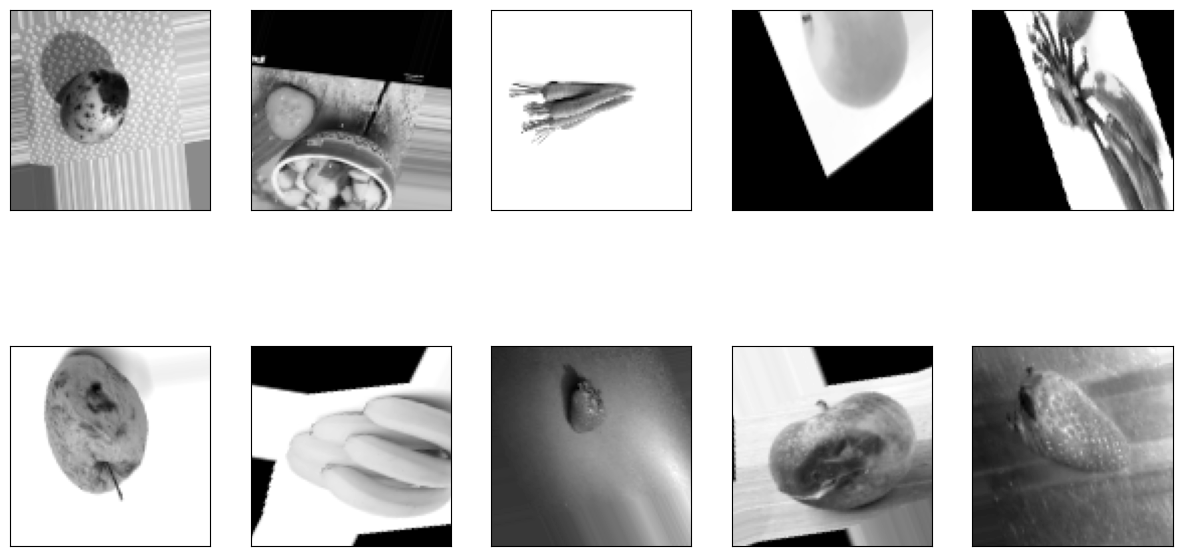

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(15,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [16]:
train_size = int(len(X) * 0.80)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 23432
Test set size: 5859


In [17]:
np.savez('../train_test_data.npz', 
         X_train=X_train, 
         X_test=X_test, 
         y_train=y_train, 
         y_test=y_test)


In [25]:
modelCNN_DA = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(28, activation='softmax')
])

In [26]:
modelCNN_DA.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [20]:
data_gen_trainning = datagen.flow(X_train, y_train, batch_size=32)

In [21]:
from tensorflow.keras.callbacks import TensorBoard

In [27]:
TensorBoardCNN_DA = TensorBoard(log_dir='logs/CNN_DA', histogram_freq=1)
modelCNN_DA.fit(data_gen_trainning, batch_size= 32, epochs=100,
              validation_data = (X_test, y_test),
              steps_per_epoch =int(np.ceil(len(X_train)/float(32))),
              validation_steps =int(np.ceil(len(X_test)/float(32))),
              callbacks=[TensorBoardCNN_DA])

Epoch 1/100
733/733 [==============================] - 240s 325ms/step - loss: 2.3665 - accuracy: 0.2637 - val_loss: 2.0088 - val_accuracy: 0.3763
Epoch 2/100
733/733 [==============================] - 242s 330ms/step - loss: 1.9202 - accuracy: 0.3955 - val_loss: 1.6587 - val_accuracy: 0.4714
Epoch 3/100
733/733 [==============================] - 237s 323ms/step - loss: 1.7201 - accuracy: 0.4600 - val_loss: 1.5739 - val_accuracy: 0.5055
Epoch 4/100
733/733 [==============================] - 239s 325ms/step - loss: 1.5883 - accuracy: 0.5048 - val_loss: 1.4207 - val_accuracy: 0.5385
Epoch 5/100
733/733 [==============================] - 242s 330ms/step - loss: 1.4820 - accuracy: 0.5332 - val_loss: 1.3016 - val_accuracy: 0.5868
Epoch 6/100
733/733 [==============================] - 242s 330ms/step - loss: 1.3891 - accuracy: 0.5601 - val_loss: 1.2227 - val_accuracy: 0.6119
Epoch 7/100
488/733 [==================>...........] - ETA: 1:15 - loss: 1.3299 - accuracy: 0.5806

KeyboardInterrupt: 

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs